In [154]:
import h5py
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('figure',  figsize=(10, 6))
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [12]:
pos = h5py.File('pretrack20.h5','r')
pos = pos['table'][:].T

In [13]:
f = pd.DataFrame(pos, index=pd.Series(np.arange(len(pos))), columns=('x','y','z','brightness','rg','peak','voxels','frame'))

In [14]:
f[:1]

x        y        z  brightness       rg     peak    voxels  frame
0  293.481  243.083  11.4584    214697.0  18.3029  652.338  0.677832    0.0

In [91]:
f['xum'] = f['x'] * 0.132
f['yum'] = f['y'] * 0.132
f['zum'] = f['z'] * 0.2

Frame 435: 871 trajectories present


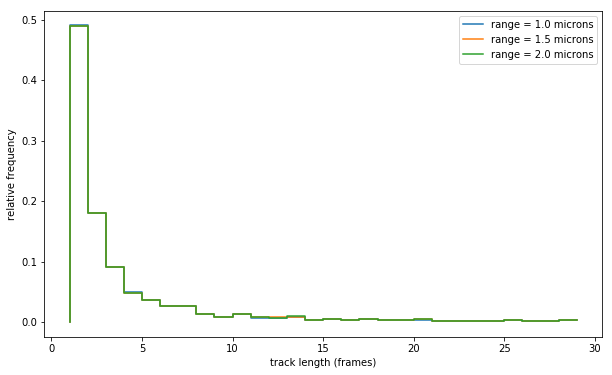

In [93]:
for search_range in [1.0, 1.5, 2.0]:
    linked = tp.link_df(f, search_range, pos_columns=['xum', 'yum', 'zum'])
    hist, bins = np.histogram(np.bincount(linked.particle.astype(int)),
                              bins=np.arange(30), normed=True)
    plt.step(bins[1:], hist, label='range = {} microns'.format(search_range))
plt.ylabel('relative frequency')
plt.xlabel('track length (frames)')
plt.legend();

In [105]:
t = pd.concat(tp.link_df_iter((frame for fnum, frame in f.groupby('frame')),10,memory=5))

Frame 0: 934 trajectories present


SubnetOversizeException: search_range (aka maxdisp) too large for reasonable performance on these data (sub net contains 39 points)

In [94]:
linked = tp.link_df(f, 2.0, pos_columns=['xum', 'yum', 'zum'])

Frame 435: 871 trajectories present


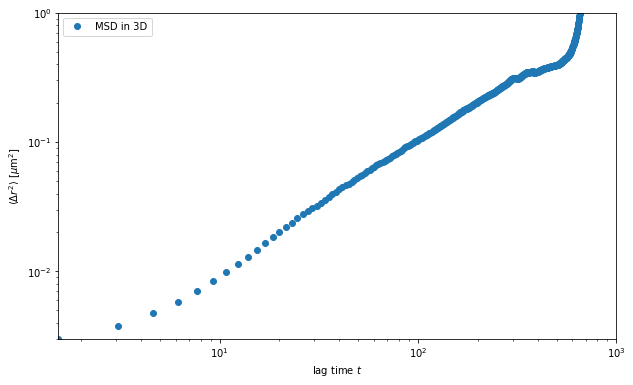

In [95]:
msd3D = tp.emsd(linked, mpp=1, fps=0.65, max_lagtime=1000,
                pos_columns=['xum', 'yum', 'zum'])
ax = msd3D.plot(style='o', label='MSD in 3D')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set(ylim=(1e-2, 10));
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1)
ax.legend(loc='upper left')

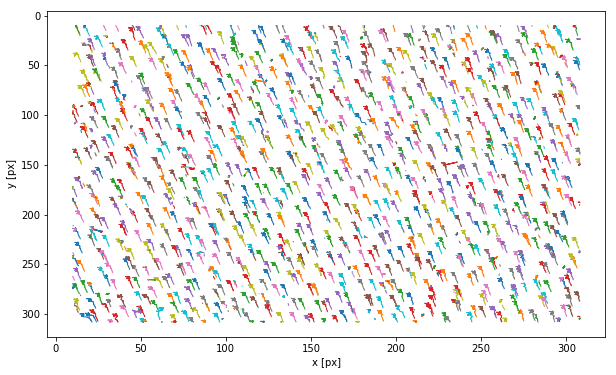

In [90]:
tp.plot_traj(linked);

In [97]:
t1 = tp.filter_stubs(linked, 50)

In [98]:
print('Before:', linked['particle'].nunique())
print('After:', t1['particle'].nunique())

('Before:', 5240)
('After:', 1011)


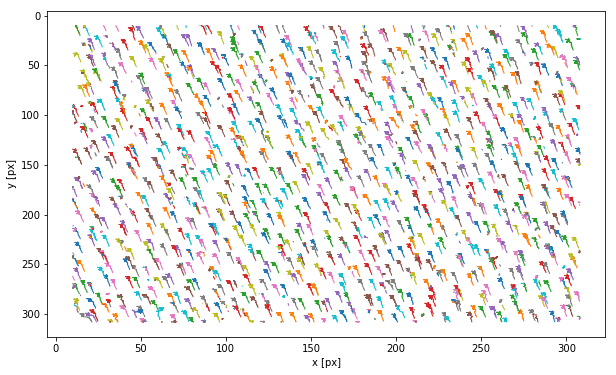

In [102]:
plt.figure()
tp.plot_traj(linked);

In [101]:
linked = tp.link_df(f, 2.0, pos_columns=['x', 'y', 'z'])

Frame 435: 871 trajectories present


In [137]:
frames = pims.ImageSequenceND(r'pmma_colloids.zip', axes_identifiers = ['z', 't'])
frames.bundle_axes = ['z', 'y', 'x']
frames.iter_axes = 't'
frames

<ImageSequenceND>
Source: /Users/mirandamazzio/Desktop/TA/pmma_colloids.zip
Axes: 4
Axis 'y' size: 128
Axis 'x' size: 128
Axis 'z' size: 25
Axis 't' size: 33
Pixel Datatype: uint8

Frame([[[ 0,  0,  0, ...,  7,  0,  0],
        [ 0,  0,  0, ...,  3,  0,  0],
        [ 0,  2,  0, ..., 13,  4,  0],
        ..., 
        [ 0,  3,  6, ...,  0,  0,  0],
        [ 5,  0,  0, ...,  1,  0,  0],
        [12, 14,  0, ...,  2,  0,  0]],

       [[ 3, 24, 18, ..., 34, 14,  4],
        [ 0,  0,  0, ..., 33,  9,  1],
        [ 6, 14,  6, ...,  0,  0,  0],
        ..., 
        [ 5,  6,  0, ...,  0,  0,  0],
        [31, 11,  2, ...,  0,  0,  1],
        [ 4,  0,  2, ...,  1,  0,  0]],

       [[ 5,  0,  6, ...,  4,  2,  4],
        [ 0,  0,  0, ...,  5,  2,  8],
        [ 7,  0,  0, ..., 12,  5,  3],
        ..., 
        [ 0,  0,  4, ...,  1,  0,  3],
        [ 4,  0,  0, ...,  0,  0,  2],
        [ 0,  1,  1, ...,  0,  1,  0]],

       ..., 
       [[12, 17, 24, ...,  4,  4,  3],
        [12,  1,  0, ...,  0,  0,  0],
        [ 0,  5,  0, ...,  0,  0,  0],
        ..., 
        [ 4,  0,  0, ..., 16, 19,  5],
        [ 8,  7, 23, ..., 16, 19, 18],
        [ 0,  0,  0, ...,  7,  1,  0]],

       [[ 0,  0,  0, ..., 40, 23,  7],
        [ 0,  0, 10, ...,  5,  3,  0],
        [ 0,  0,  0, ..., 14,  7,  3],
        ..., 
        [ 0,  0,  4, ...,  7, 11, 15],
        [ 8,  1,  0, ..., 13,  5,  5],
        [25,  0, 15, ...,  0,  0,  3]],

       [[ 0,  2,  0, ..., 12,  0,  0],
        [15,  1, 14, ..., 30, 15,  1],
        [ 0,  4,  0, ...,  0,  0,  0],
        ..., 
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  5,  0, ..., 21,  5,  2],
        [27,  9,  0, ...,  6,  8,  5]]], dtype=uint8)
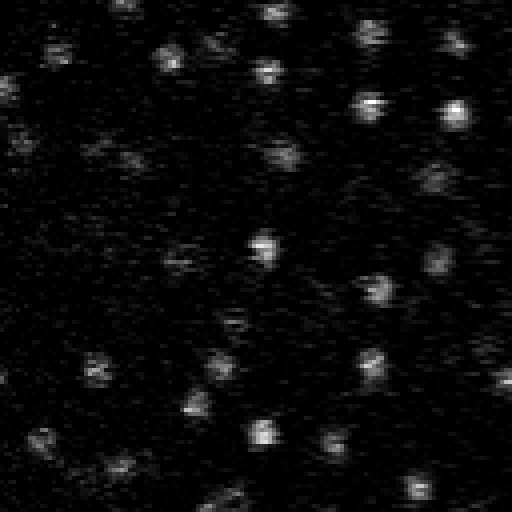
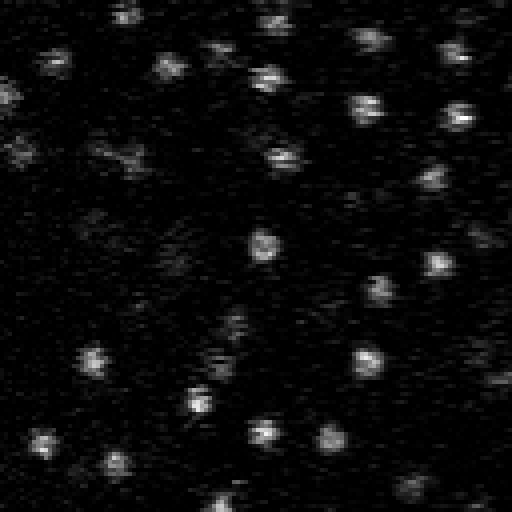
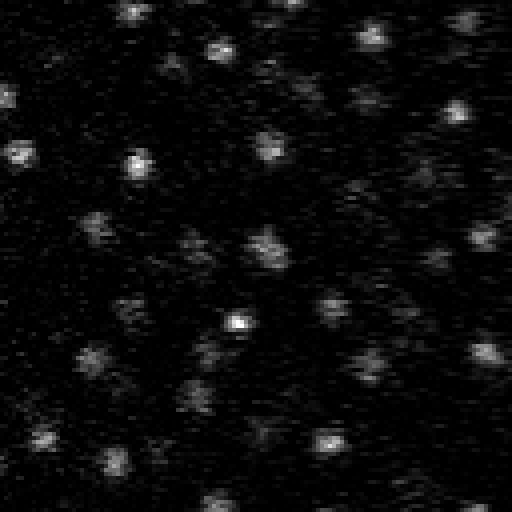
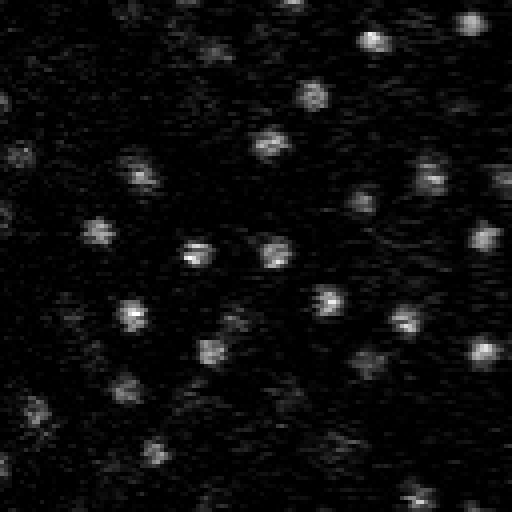
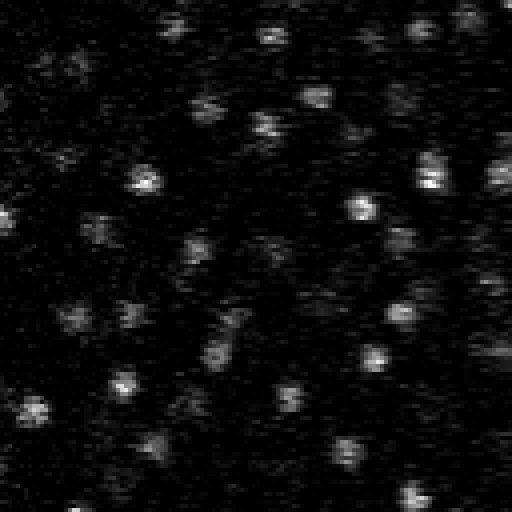
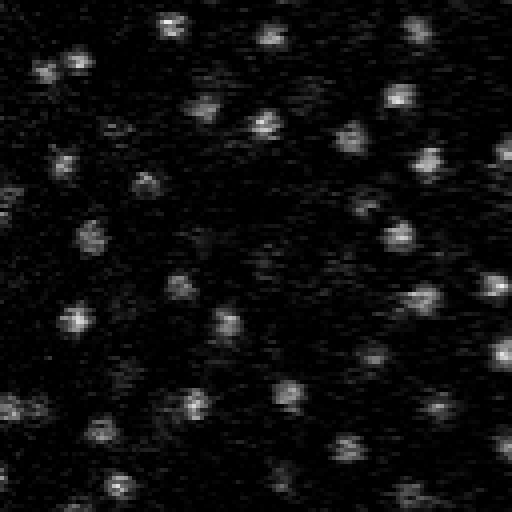
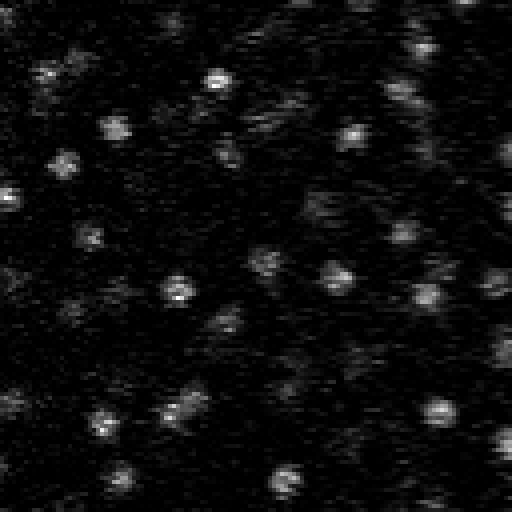
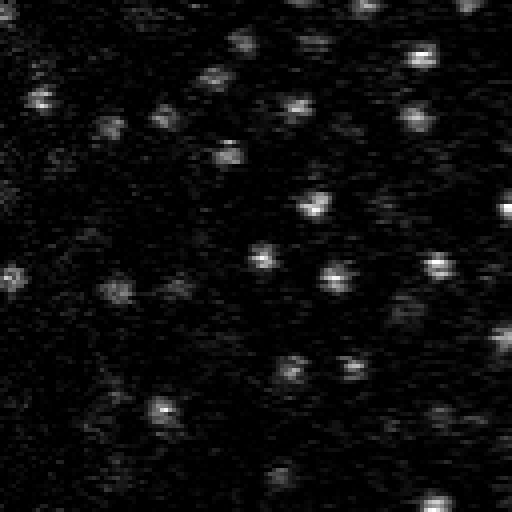
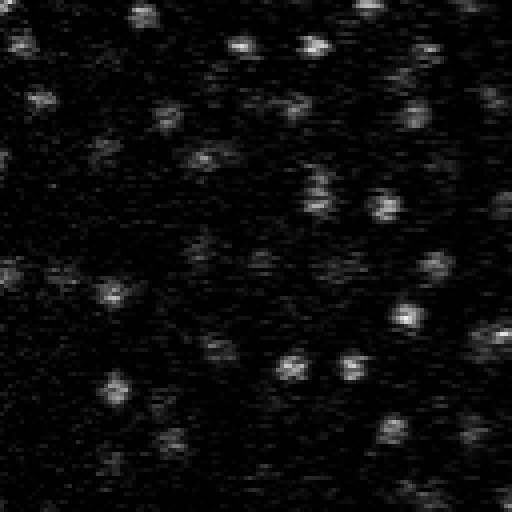
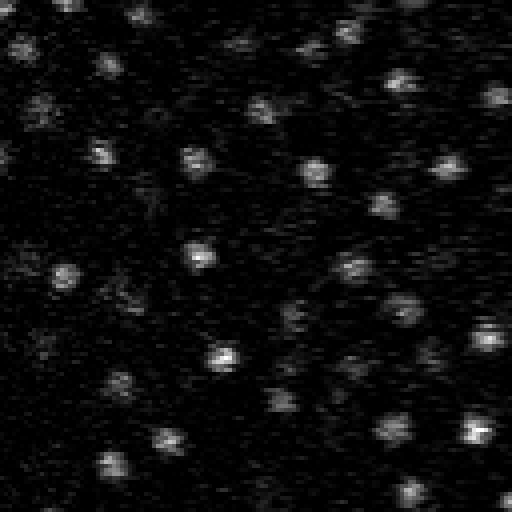
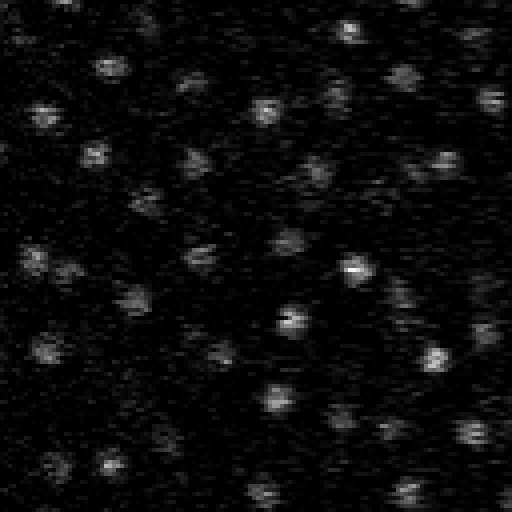
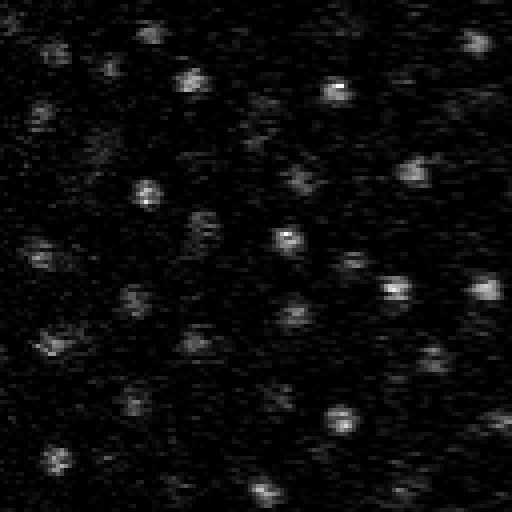
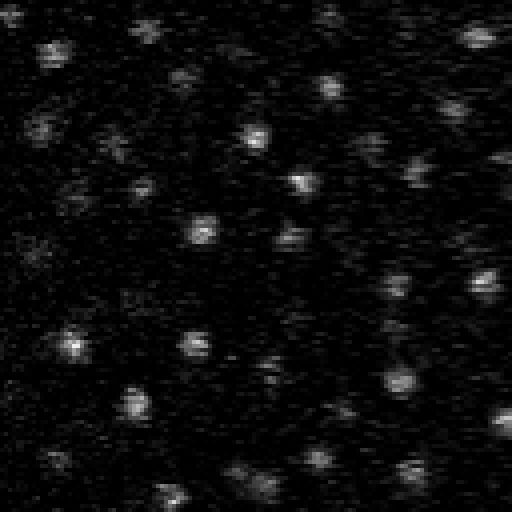
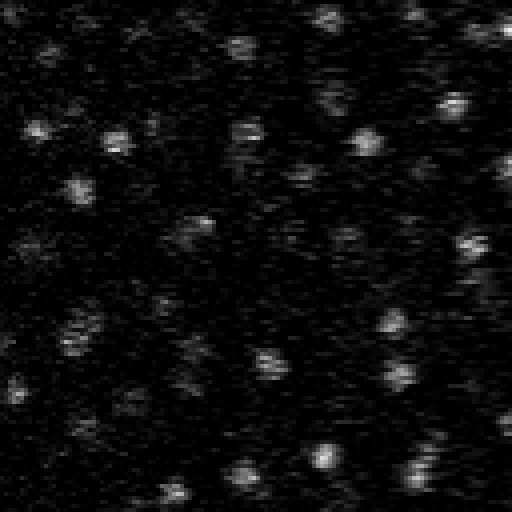
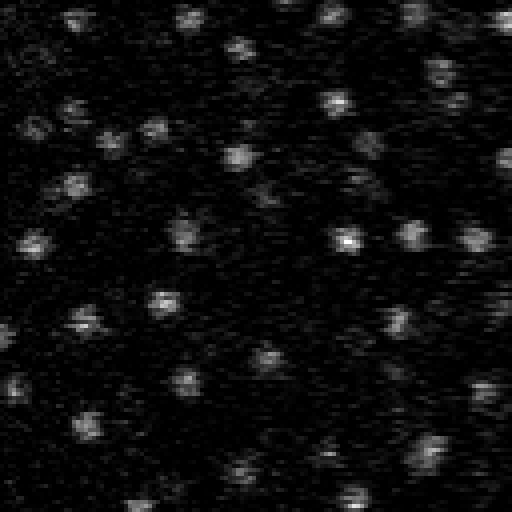
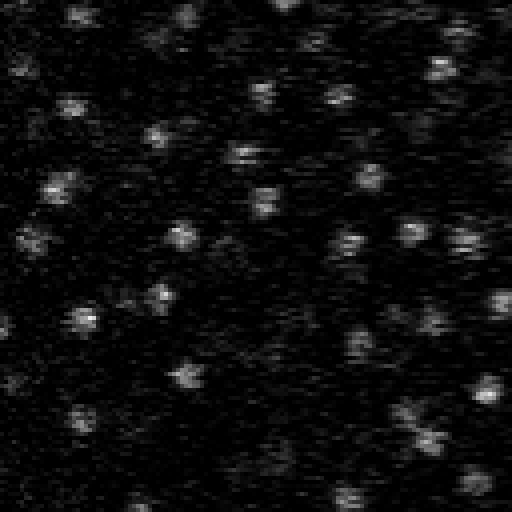
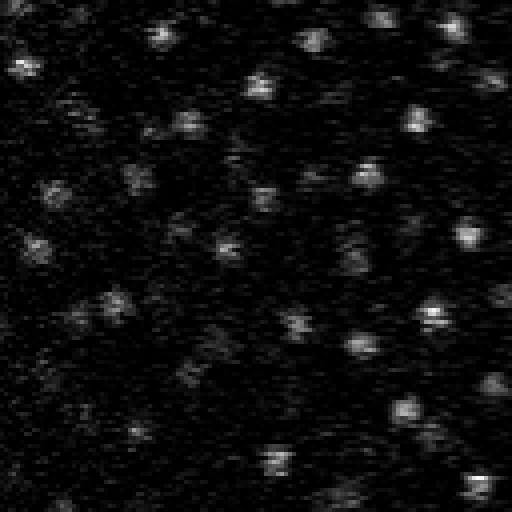
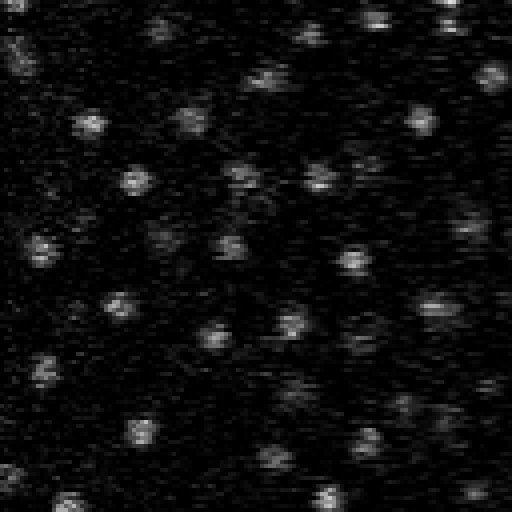
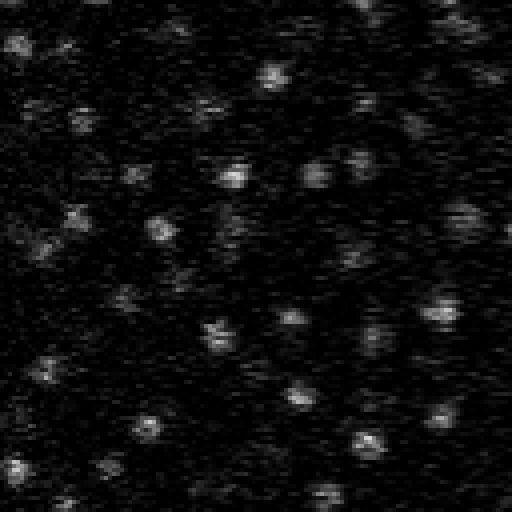
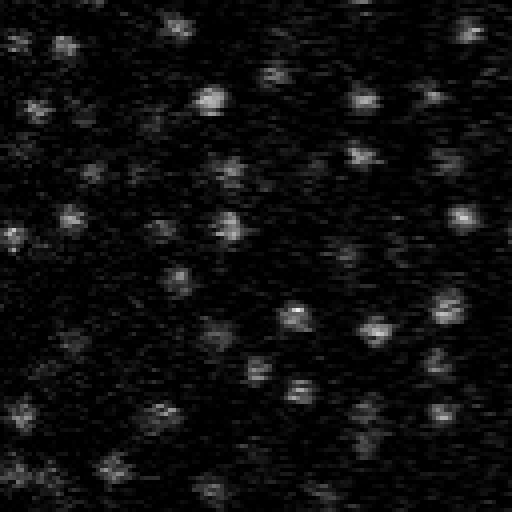
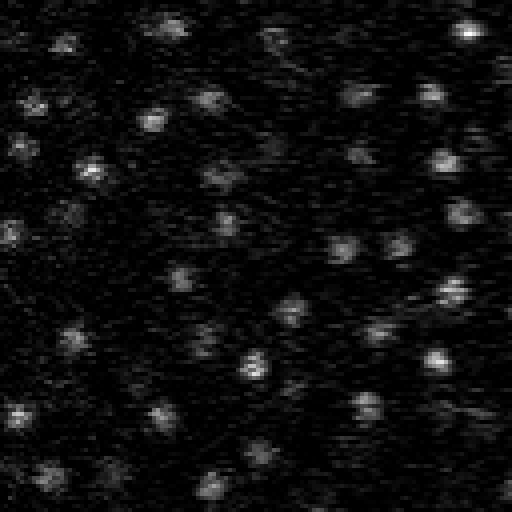
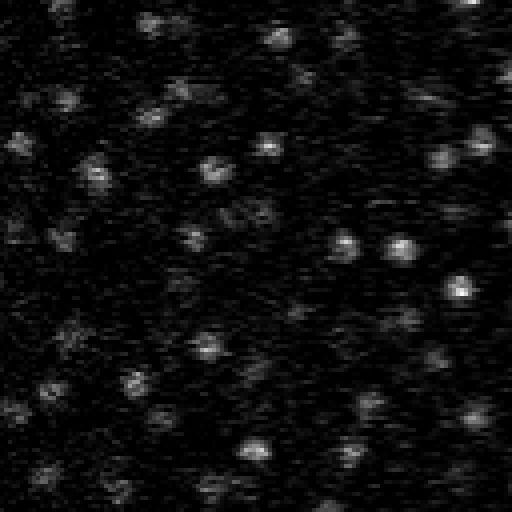
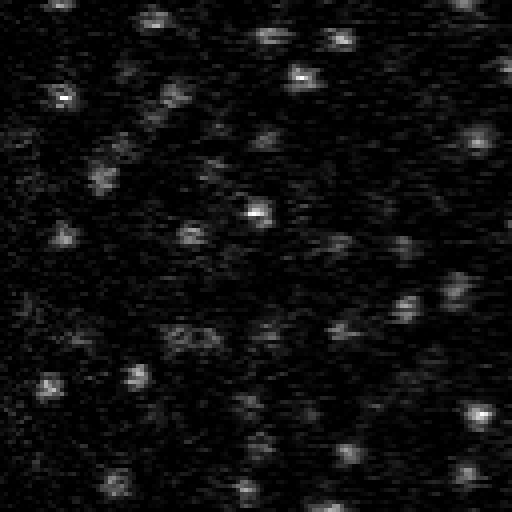
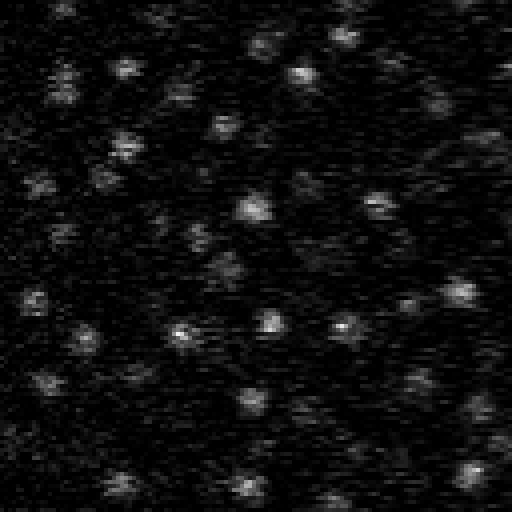
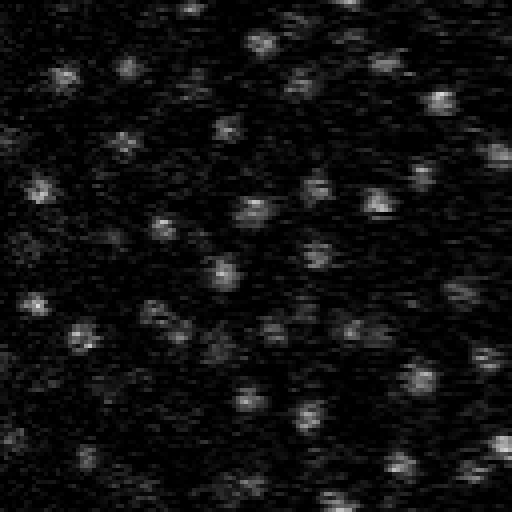

In [138]:
frames[0]

In [139]:
features = tp.locate(frames[0], diameter=(5,9,9))
features.head() 

x          y         z         mass    size_x    size_y    size_z  \
0  92.767433   9.071717  2.012807  7553.365130  2.860394  2.664790  1.405949   
1  54.699301  12.226904  1.914376  4292.992821  2.822186  2.612282  1.350980   
2  67.939605  36.920566  2.034397  6046.271210  2.932036  2.923429  1.355468   
3   4.873736  37.946181  1.959566  5167.455532  2.897684  2.790967  1.332147   
4  58.815787  80.024481  2.059946  5195.991650  2.813727  2.594056  1.386898   

   ecc      signal  raw_mass      ep_x      ep_y      ep_z  frame  
0  NaN  119.948425   11471.0  0.011444  0.011444  0.005131      0  
1  NaN   77.386081    7476.0  0.017963  0.017963  0.008053      0  
2  NaN   83.190037    9711.0  0.013622  0.013622  0.006107      0  
3  NaN   81.739048    8632.0  0.015421  0.015421  0.006913      0  
4  NaN   98.183590    7986.0  0.016745  0.016745  0.007507      0

Frame([[[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        ..., 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]]],


       [[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        ..., 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]]],


       [[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        ..., 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]]],


       ..., 
       [[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 
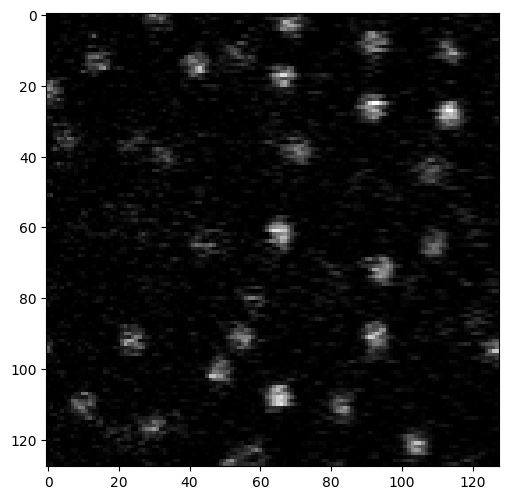
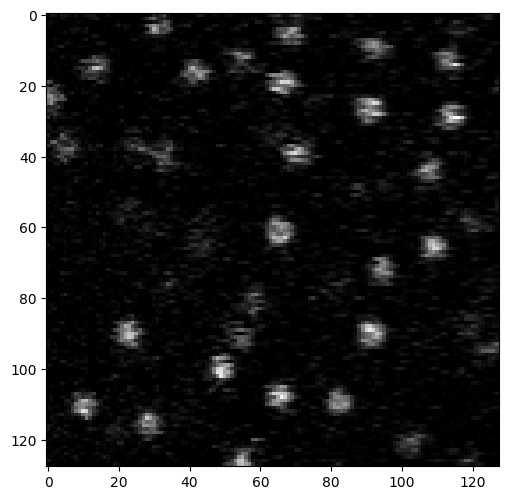
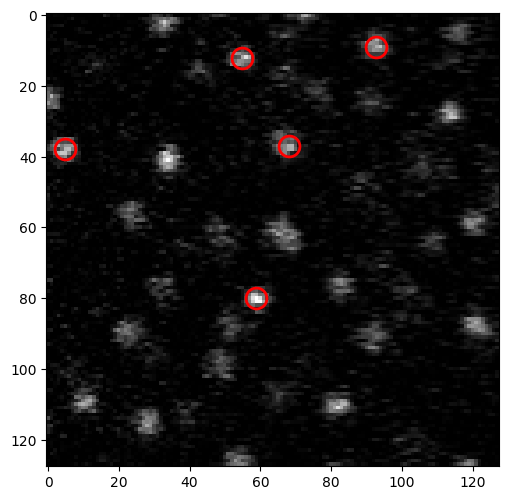
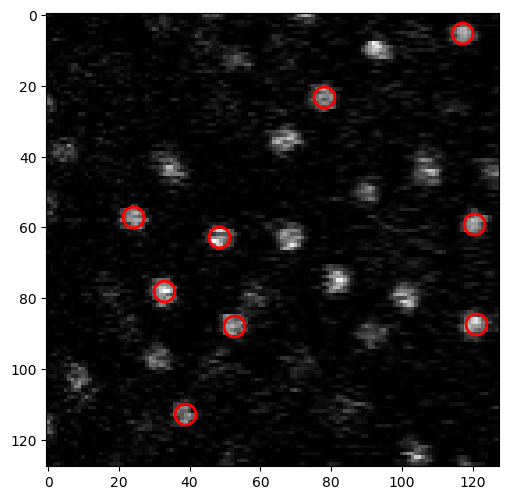
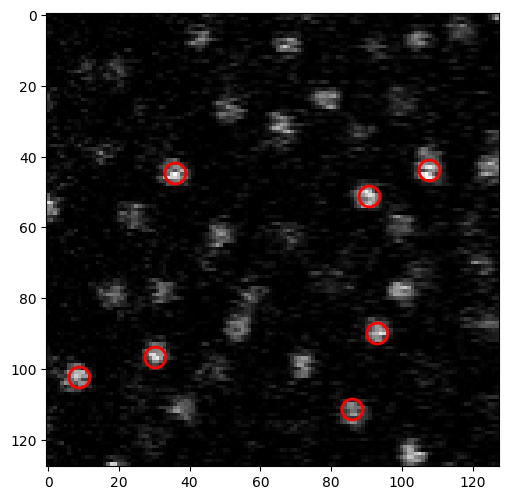
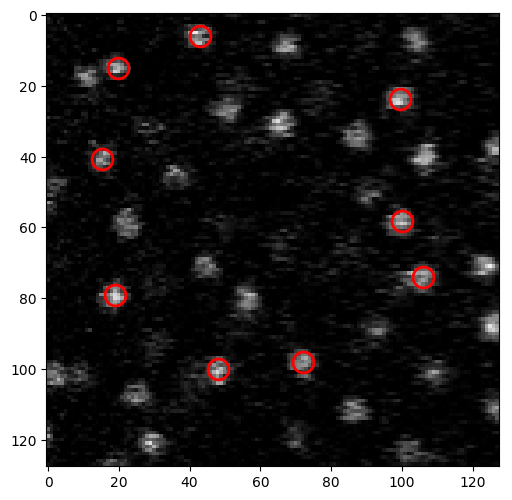
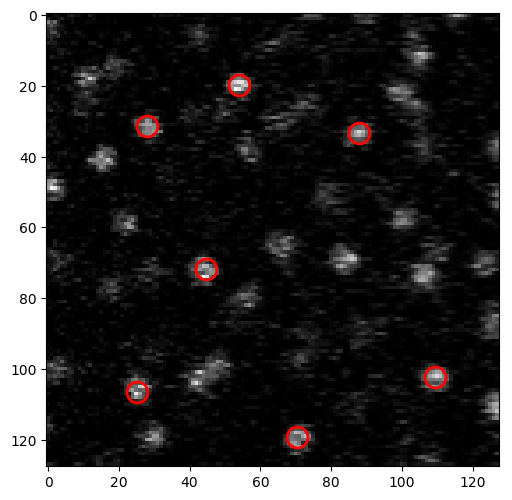
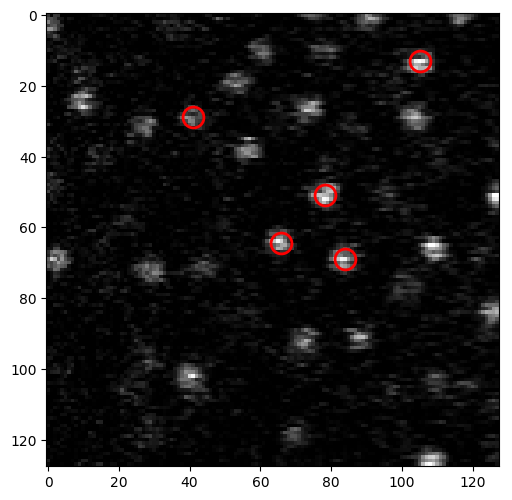
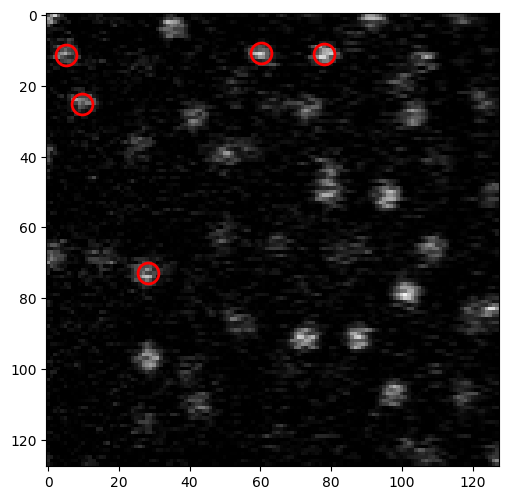
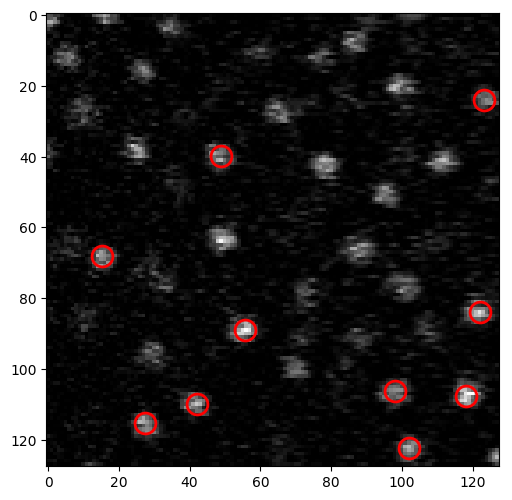
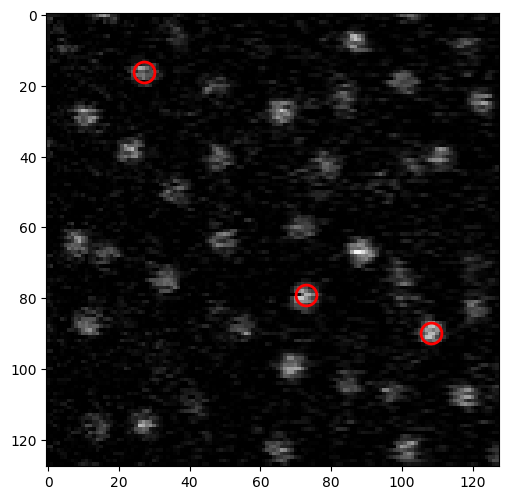
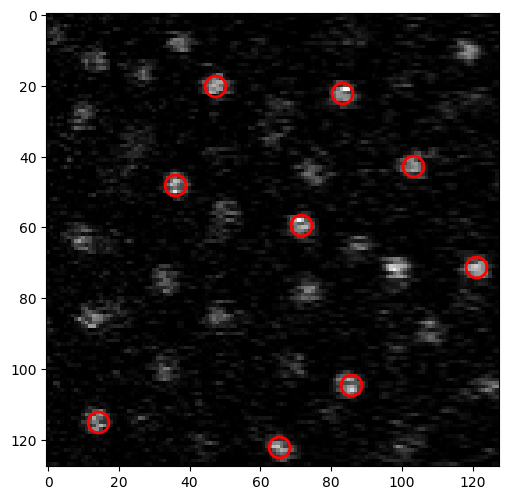
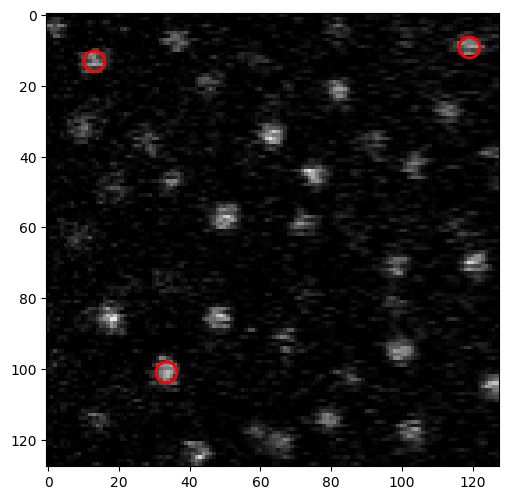
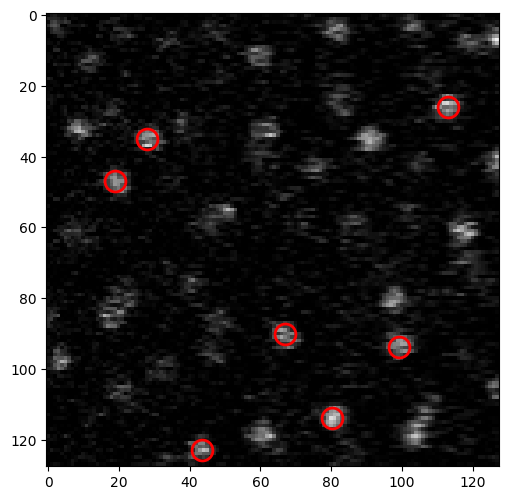
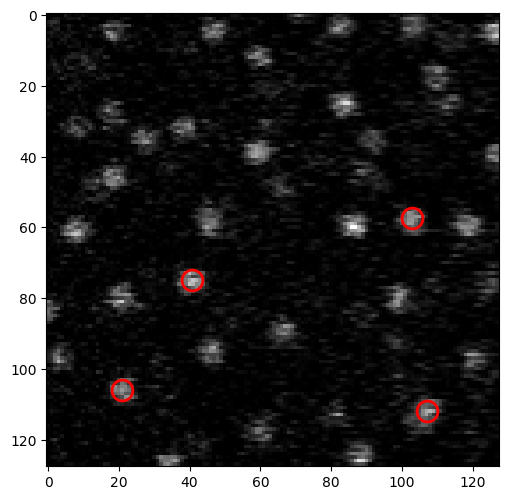
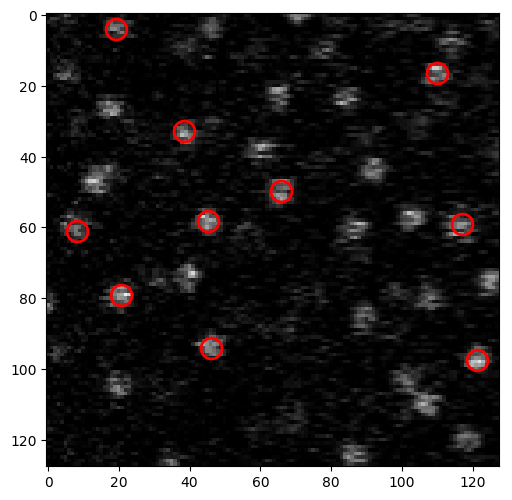
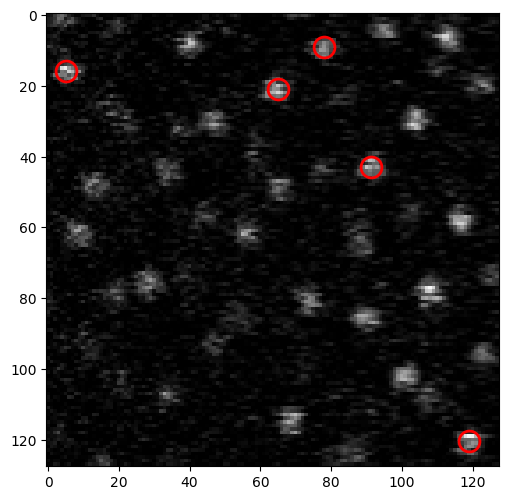
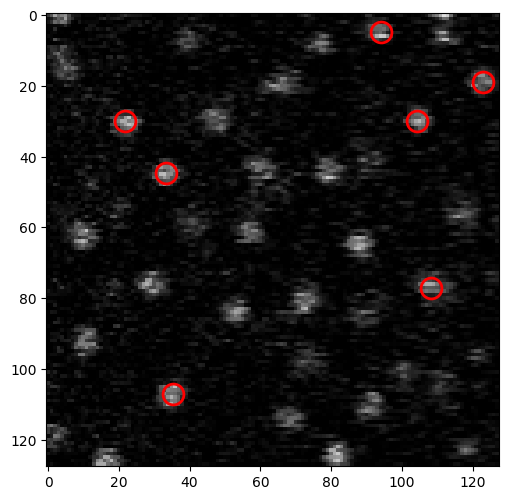
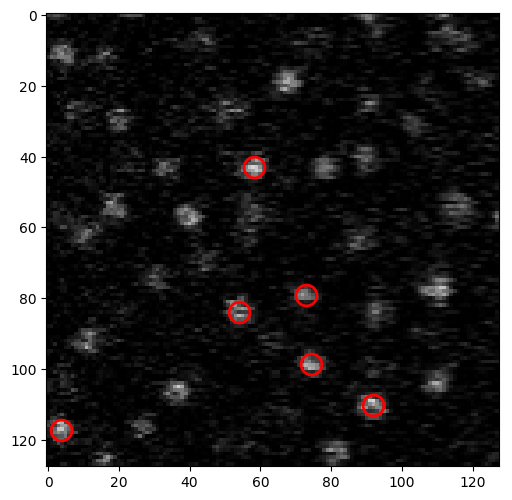
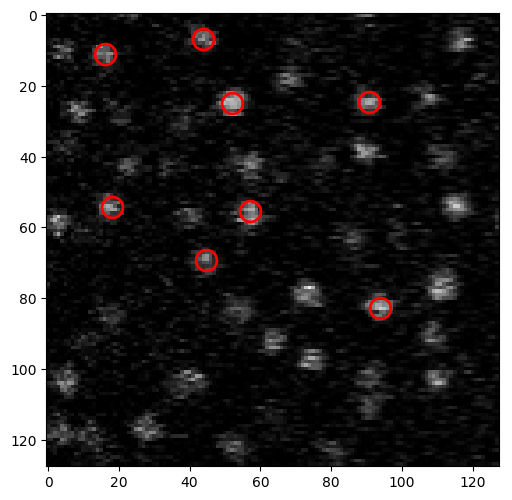
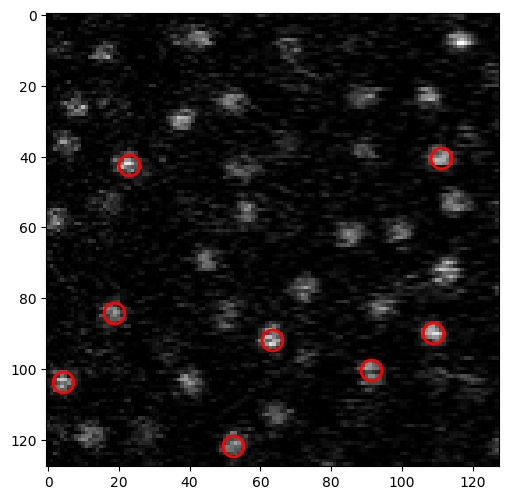
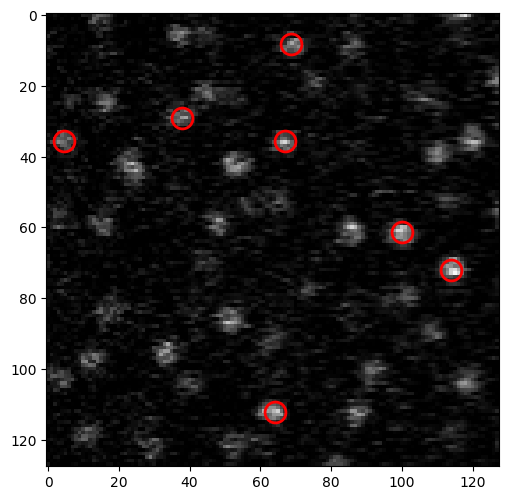
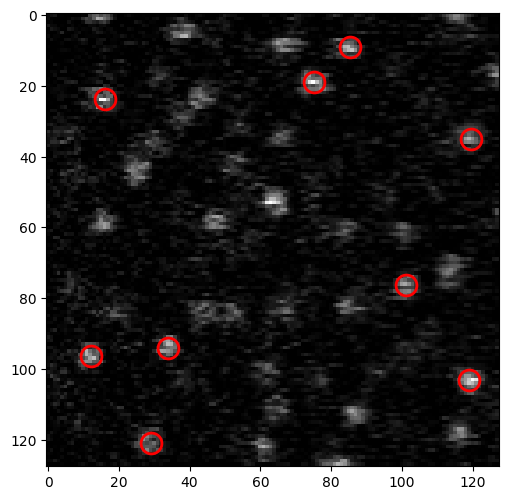
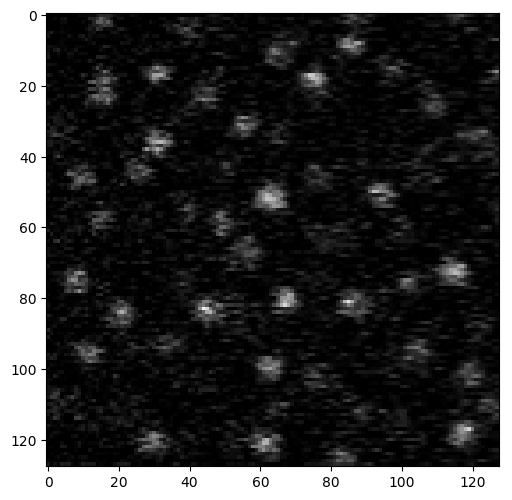
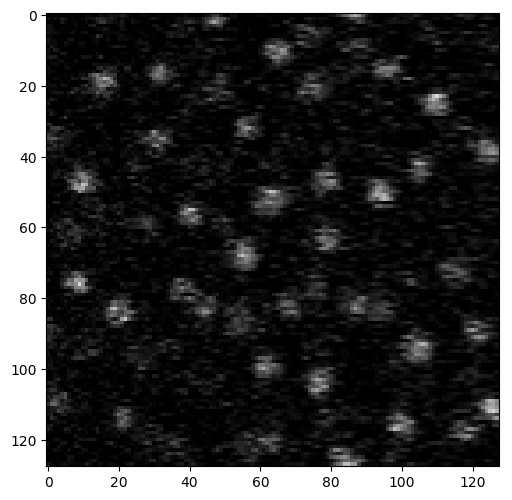

In [140]:
tp.annotate3d(features, frames[0])

Features found: 143


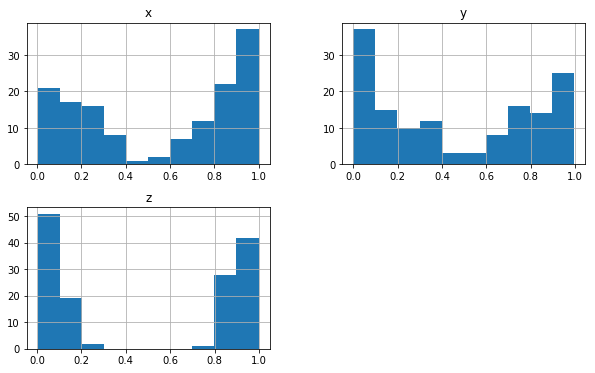

In [141]:
tp.subpx_bias(features)
print('Features found: {0}'.format(len(features)))

Features found: 88


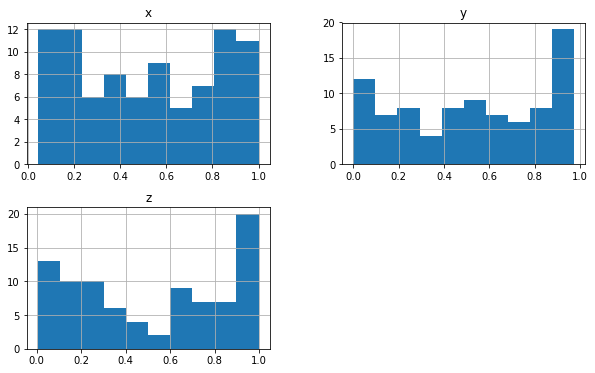

In [142]:
features2 = tp.locate(frames[0], diameter=(7, 11, 11))
tp.subpx_bias(features2)
print('Features found: {0}'.format(len(features2)))

Features found: 165


Frame([[[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        ..., 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]]],


       [[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        ..., 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]]],


       [[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        ..., 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]]],


       ..., 
       [[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 
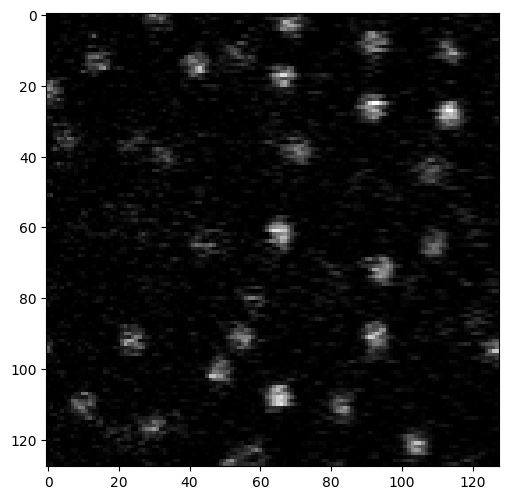
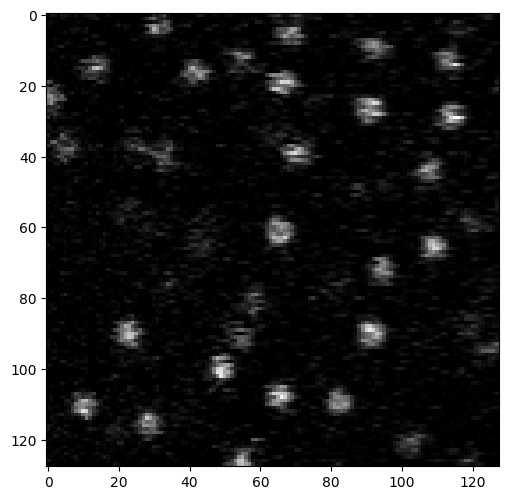
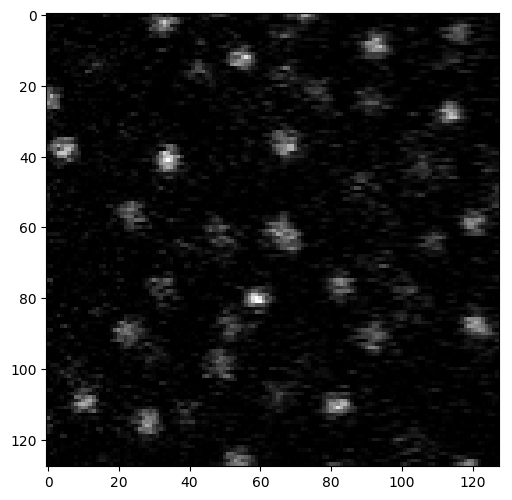
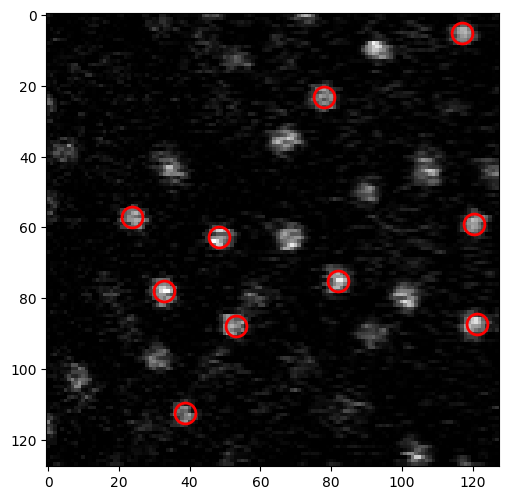
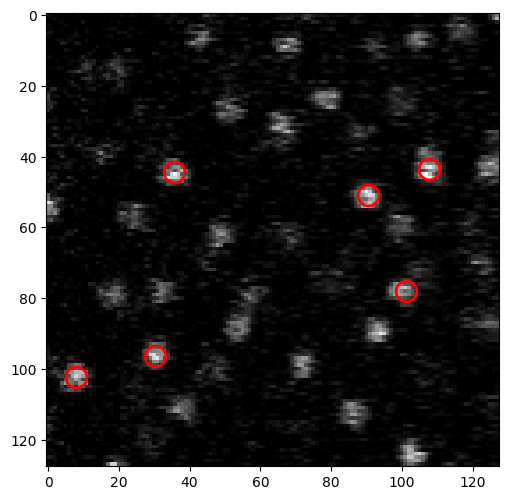
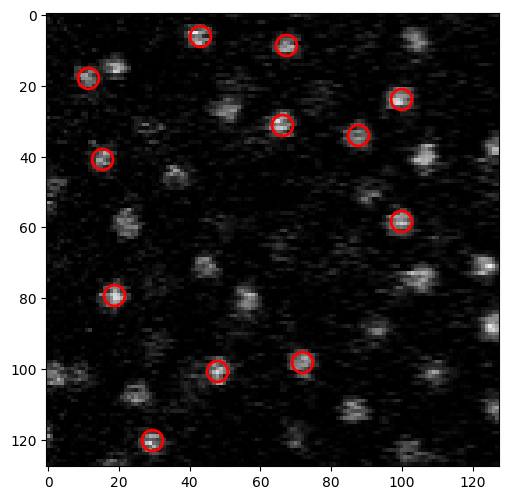
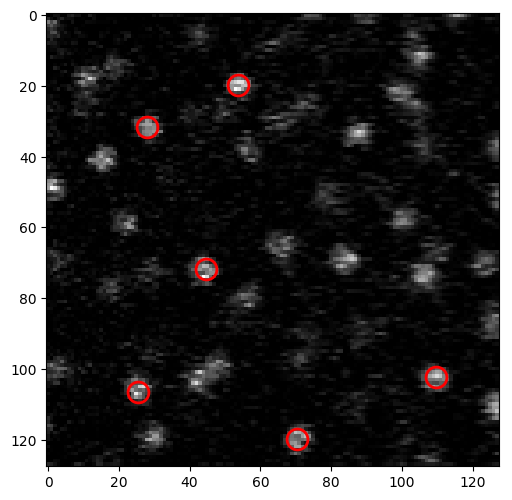
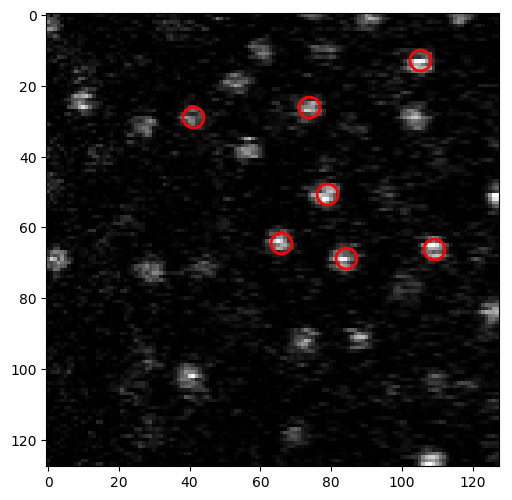
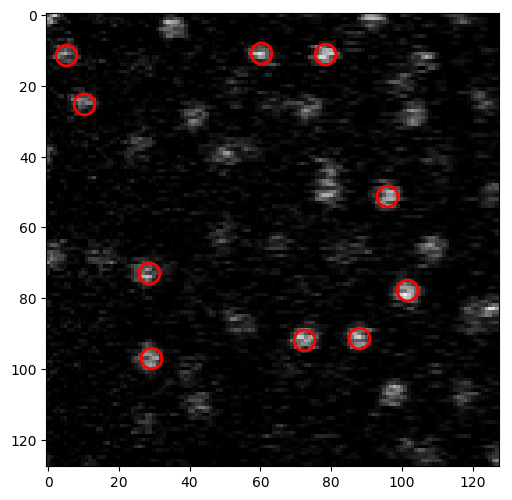
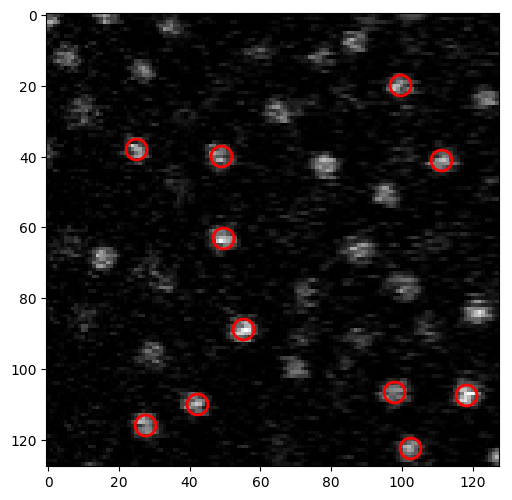
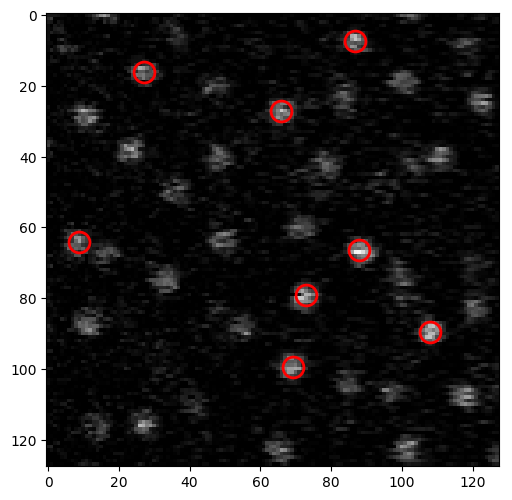
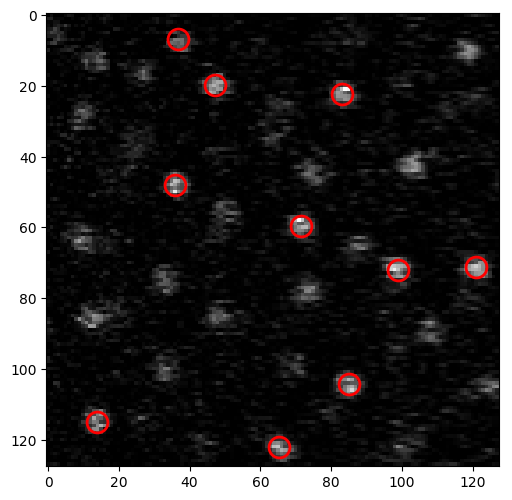
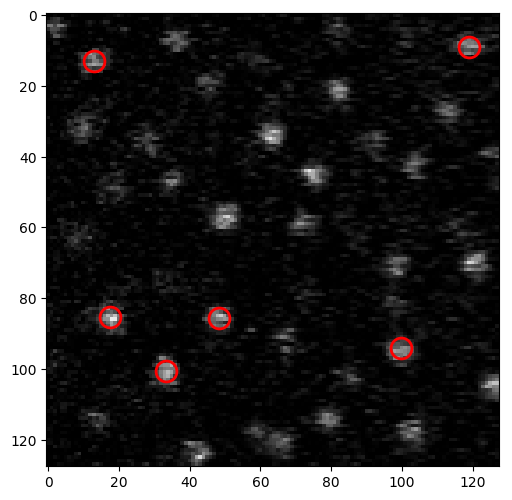
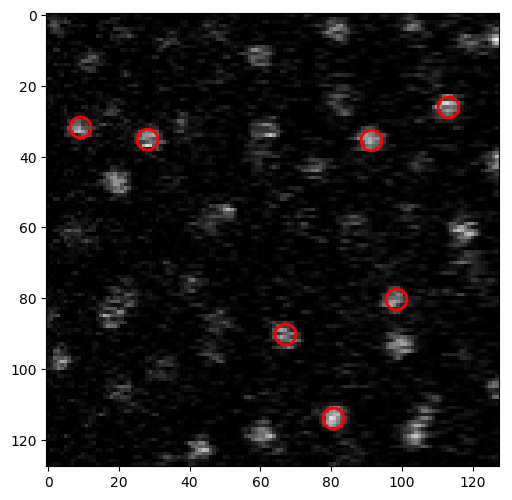
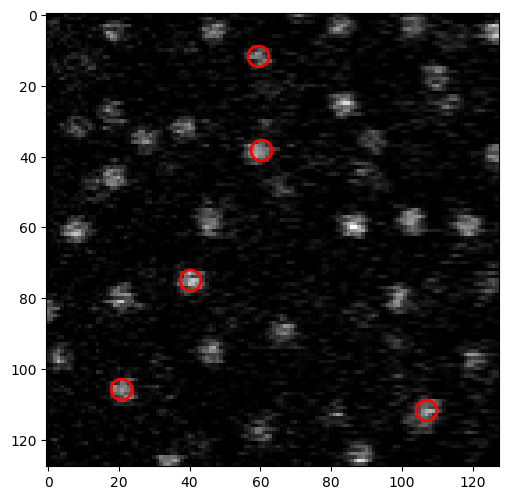
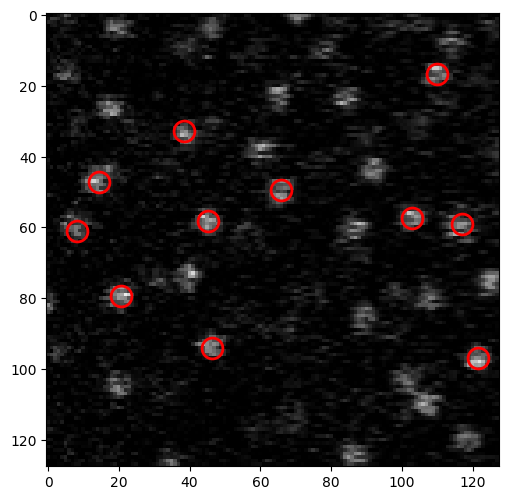
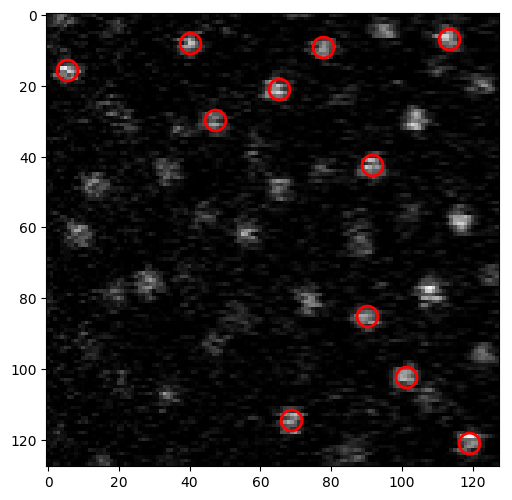
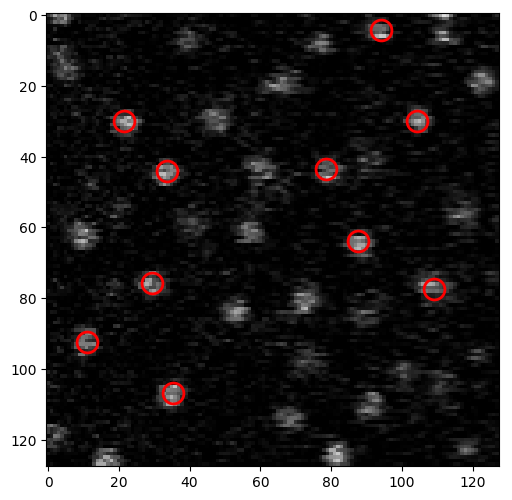
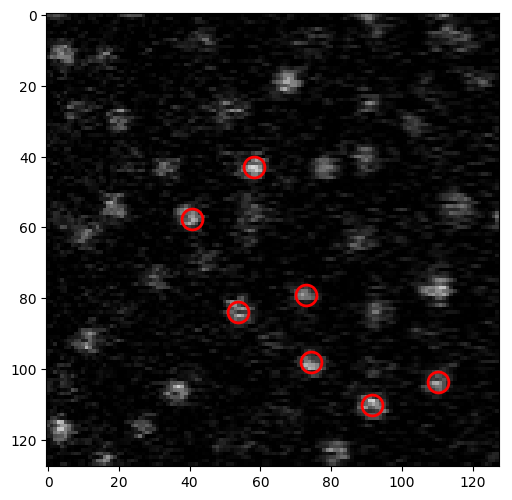
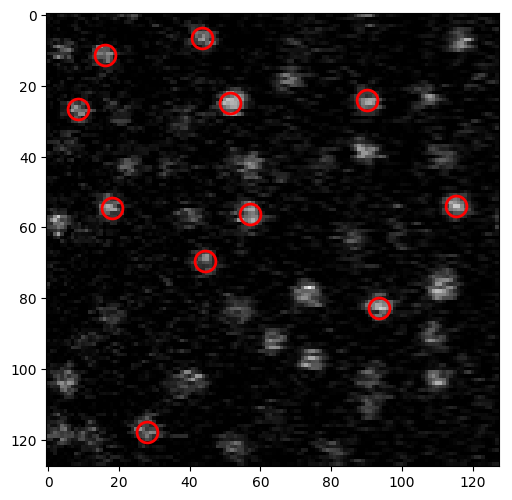
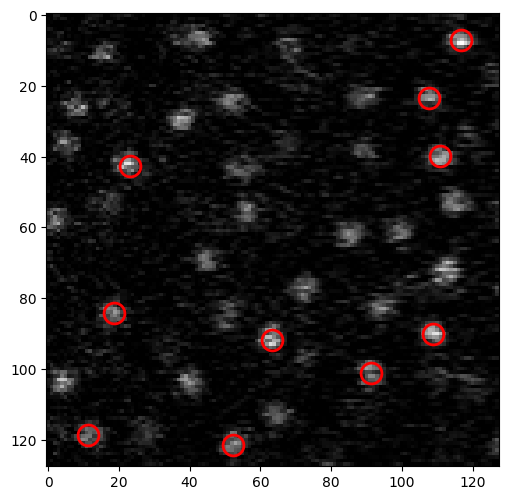
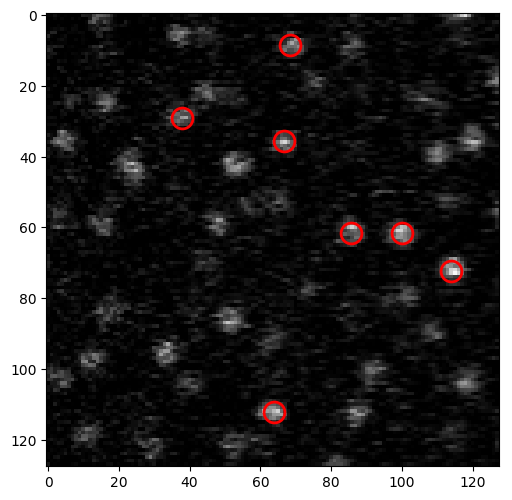
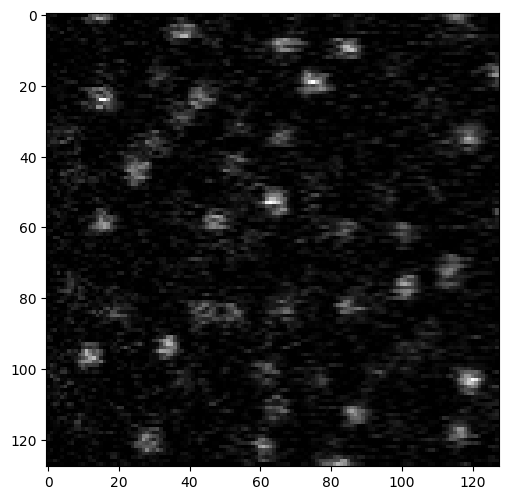
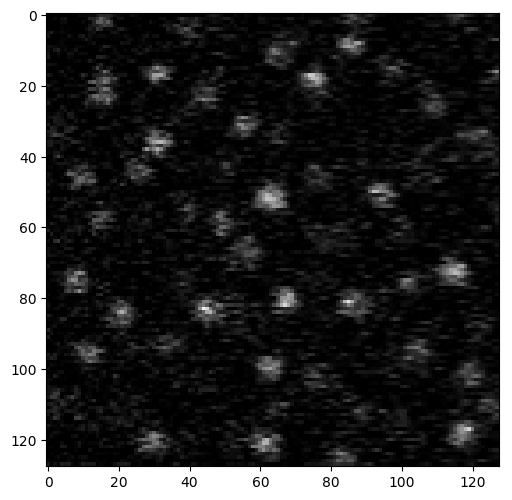
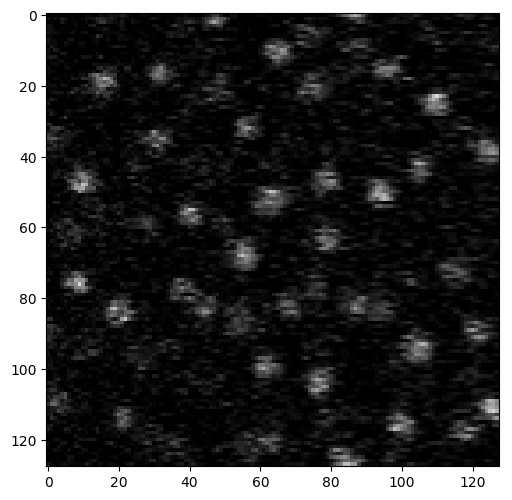

In [143]:
features3 = tp.locate(frames[0], diameter=(7, 11, 11), separation=(3, 11, 11))
print('Features found: {0}'.format(len(features3)))
tp.annotate3d(features3, frames[0])

In [144]:
f = tp.batch(frames, diameter=(7, 11, 11), separation=(3, 11, 11))

Frame 32: 159 features


In [145]:
f['xum'] = f['x'] * 0.21
f['yum'] = f['y'] * 0.21
f['zum'] = f['z'] * 0.75

Frame 32: 159 trajectories present


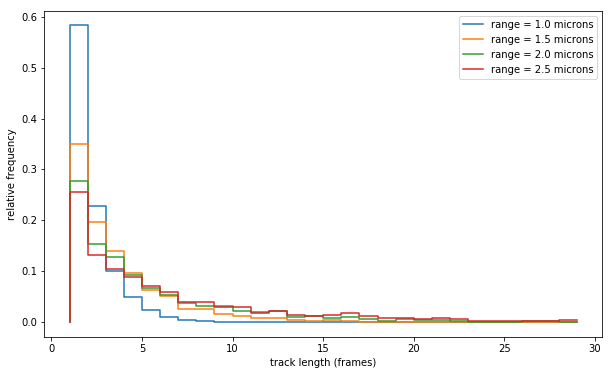

In [146]:
for search_range in [1.0, 1.5, 2.0, 2.5]:
    linked = tp.link_df(f, search_range, pos_columns=['xum', 'yum', 'zum'])
    hist, bins = np.histogram(np.bincount(linked.particle.astype(int)),
                              bins=np.arange(30), normed=True)
    plt.step(bins[1:], hist, label='range = {} microns'.format(search_range))
plt.ylabel('relative frequency')
plt.xlabel('track length (frames)')
plt.legend();

In [147]:
linked = tp.link_df(f, 2.0, pos_columns=['xum', 'yum', 'zum'])

Frame 32: 159 trajectories present


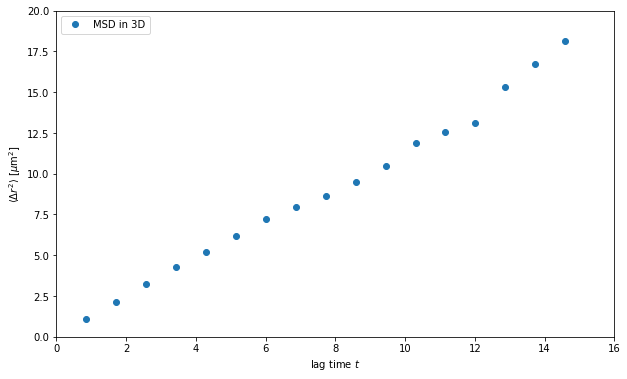

In [148]:
msd3D = tp.emsd(linked, mpp=1, fps=1/0.8582, max_lagtime=20,
                pos_columns=['xum', 'yum', 'zum'])
ax = msd3D.plot(style='o', label='MSD in 3D')
ax.set_ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
ax.set_xlabel('lag time $t$')
ax.set_xlim(0, 16)
ax.set_ylim(0, 20)
ax.legend(loc='upper left');

The diffusion constant is 0.20 μm²/s


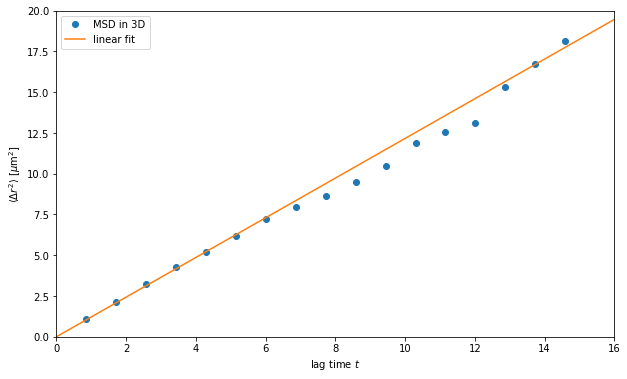

In [149]:
slope = np.linalg.lstsq(msd3D.index[:, np.newaxis], msd3D)[0][0]

ax = msd3D.plot(style='o', label='MSD in 3D')
ax.plot(np.arange(20), slope * np.arange(20), label='linear fit')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]', xlabel='lag time $t$')
ax.set(xlim=(0, 16), ylim=(0, 20))
ax.legend(loc='upper left')
print(r'The diffusion constant is {0:.2f} μm²/s'.format(slope / 6))

In [151]:
#!/usr/bin/env python
import glob
import re
import os
 
files = glob.glob('*.JPG')  # get *.JPG in a list (not sorted!)
files.sort()                # sort the list _in place_
cnt = 11                    # start new names with 11.jpg
 
for f in files:
    original = f                                    # save the original file name
    result = re.search(r'Scan(\d+)\.JPG', f)        # pattern to match
    if result:                                      # Is there a match?
        new_name = str(cnt) + '.jpg'                # create the new name
        print "%s => %s" % (original, new_name)     # verify if it's OK
        # os.rename(original, new_name)             # then uncomment to rename
        cnt += 1                                    # increment the counter
  

In [157]:
frames = pims.ImageSequenceND(r'asm272_3d_5/*.tif', axes_identifiers = ['z', 't'])
frames.bundle_axes = ['z', 'y', 'x']
frames.iter_axes = 't'
frames

IndexError: index 1 is out of bounds for axis 1 with size 1